Cohort and Segment Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/screen_time_dataset.csv')
df.head(5)


,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,12,Child,Male,4,Yes,Tablet,Mobile,10,No,0.7,Eye Strain,Mild,Urban
1,15,Teen,Female,6,Yes,Laptop,Computer,15,Yes,0.5,Headache,Moderate,Urban
2,22,Young Adult,Male,8,No,Smartphone,Mobile,6,Yes,0.0,Insomnia,Moderate,Rural
3,35,Adult,Female,3,Yes,Laptop,Computer,14,No,0.8,Neck Pain,Mild,Urban
4,45,Adult,Male,5,No,Tablet,Mobile,10,Yes,0.4,Eye Strain,Moderate,Rural


In [2]:
cohort_analysis = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
Top_cohorts = cohort_analysis.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False).head(10)
print(Top_cohorts)


     Age_Group Primary_Device  Avg_Daily_Screen_Time_hr
9  Young Adult     Smartphone                       8.5
1        Adult     Smartphone                       7.0
8         Teen         Laptop                       7.0
3        Adult         Tablet                       5.0
0        Adult         Laptop                       4.5
2        Adult             TV                       4.0
5        Child         Tablet                       4.0
4        Child     Smartphone                       4.0
7       Senior         Tablet                       2.0
6       Senior             TV                       2.0


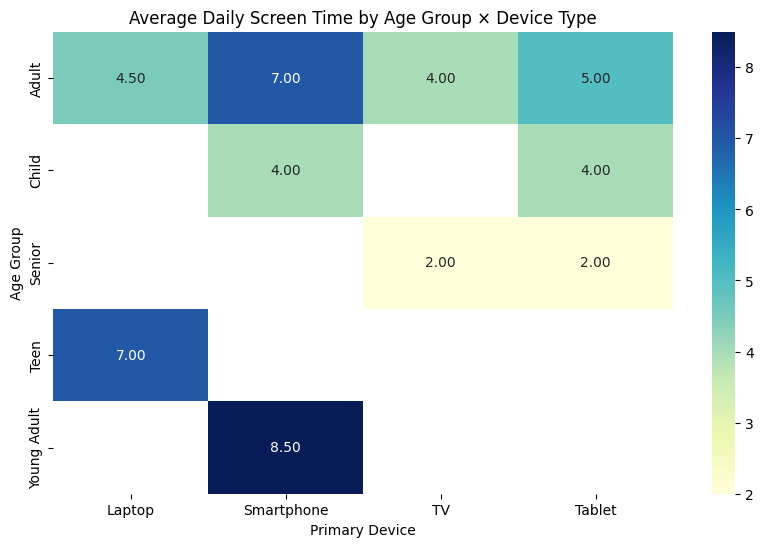

In [3]:
## Average screen time by Age Group and Primary Device
cohort = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Pivot for heatmap
cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Daily Screen Time by Age Group × Device Type")
plt.xlabel("Primary Device")
plt.ylabel("Age Group")
plt.show()

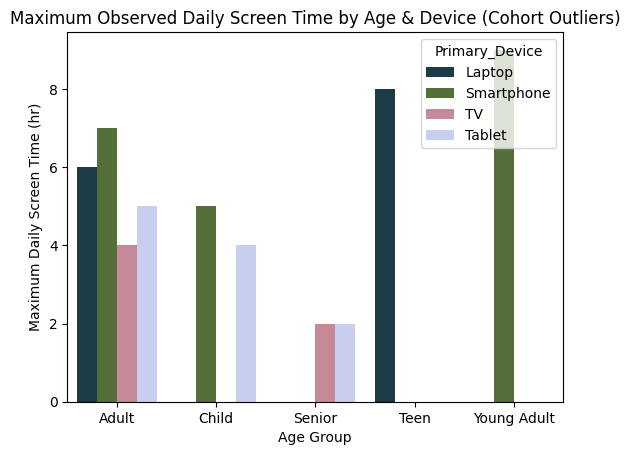

In [4]:
#  Outlier Analysis: Who are the 'extreme screeners'? (longest average screen time)
outlier_cohort = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].max().reset_index()
sns.barplot(
    data=outlier_cohort, x='Age_Group', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='cubehelix'
)
plt.title('Maximum Observed Daily Screen Time by Age & Device (Cohort Outliers)')
plt.ylabel('Maximum Daily Screen Time (hr)')
plt.xlabel('Age Group')
plt.show()

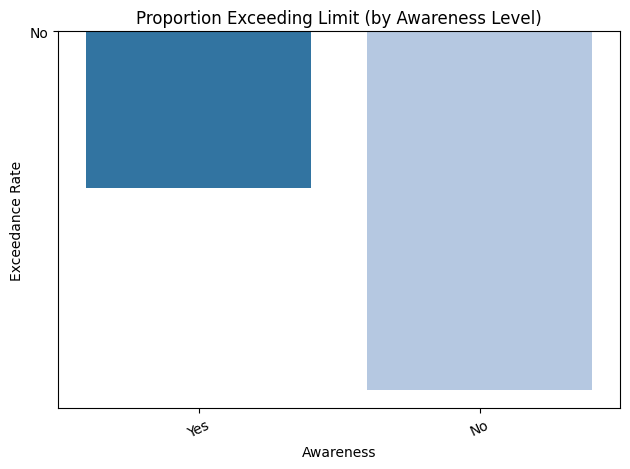

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(
    x='awareness',
    y='Exceeded_Recommended_Limit',
    data=df,
    estimator=np.mean,
    errorbar=None,
    palette='tab20',
    hue='awareness',        # assign awareness as hue for future compatibility
    legend=False
)
plt.title('Proportion Exceeding Limit (by Awareness Level)')
plt.ylabel('Exceedance Rate')
plt.xlabel('Awareness')
plt.xticks(rotation=25)     # Rotate x labels for clarity
plt.tight_layout()          # Prevent text overlap
plt.show()


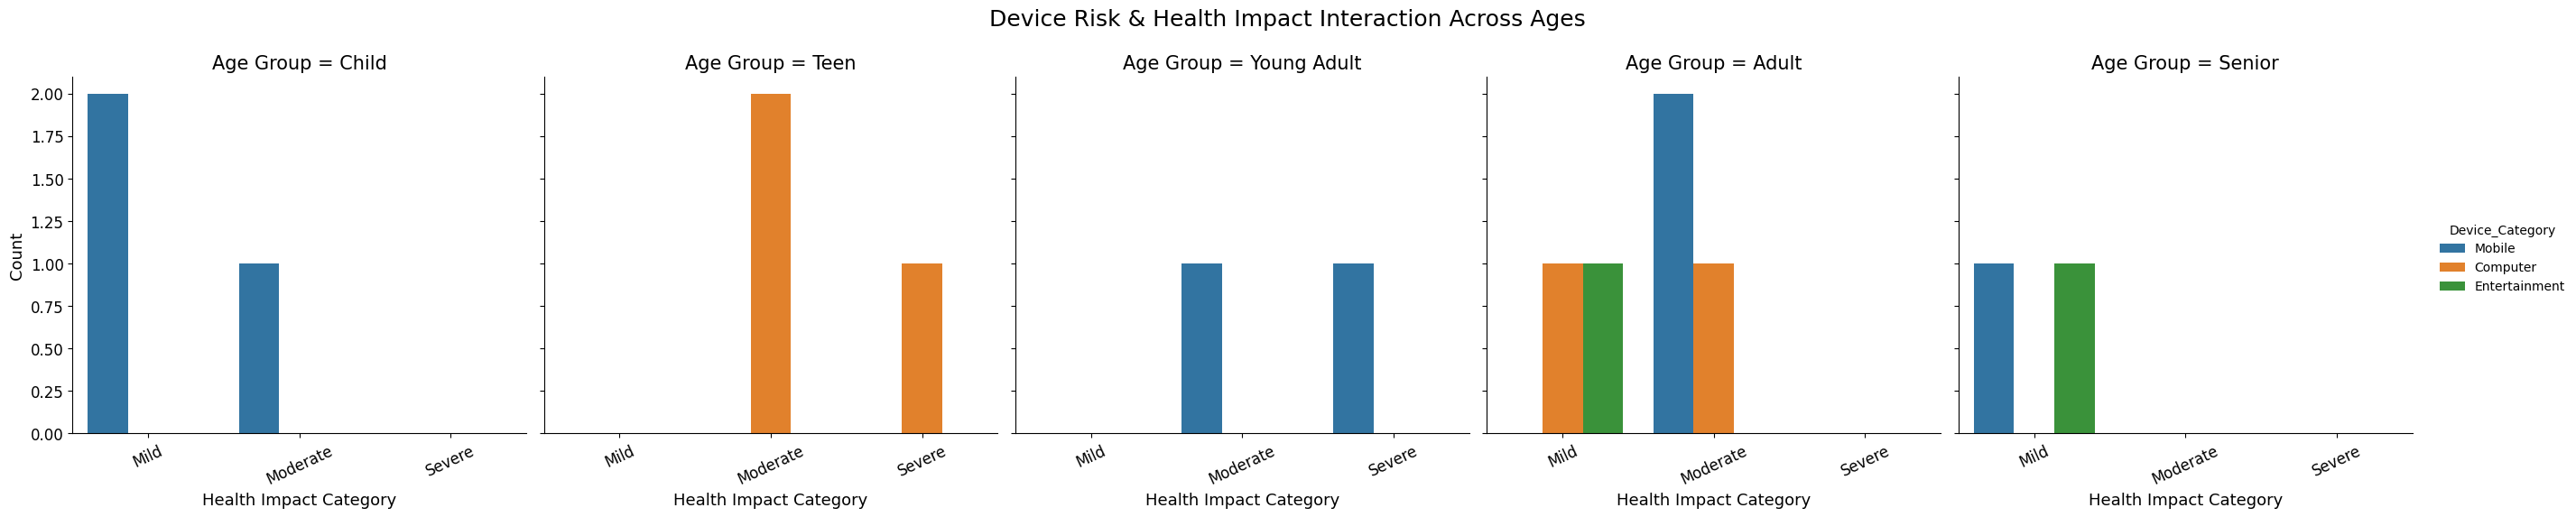

In [6]:
g = sns.catplot(
    x='Health_Impact_Category',
    hue='Device_Category',
    col='Age_Group',
    data=df,
    kind='count',
    height=5.4,
    aspect=1
)

g.set_titles('Age Group = {col_name}', size=15)
g.set_axis_labels('Health Impact Category', 'Count', fontsize=13)
g.fig.subplots_adjust(top=0.84)
g.fig.suptitle('Device Risk & Health Impact Interaction Across Ages', fontsize=18)

# Only set tick labels formatting *after* matplotlib has drawn the plot
plt.draw()  # This triggers ticks to be set so next step is safe!
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)

plt.show()


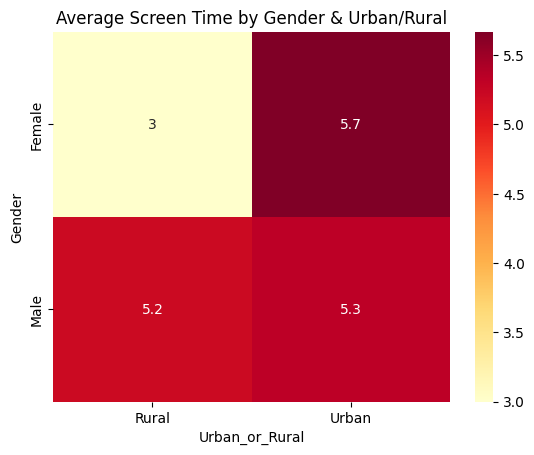

In [8]:
pivot = pd.pivot_table(
    df, index='Gender', columns='Urban_or_Rural',
    values='Avg_Daily_Screen_Time_hr', aggfunc='mean'
)
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Average Screen Time by Gender & Urban/Rural')
plt.show()

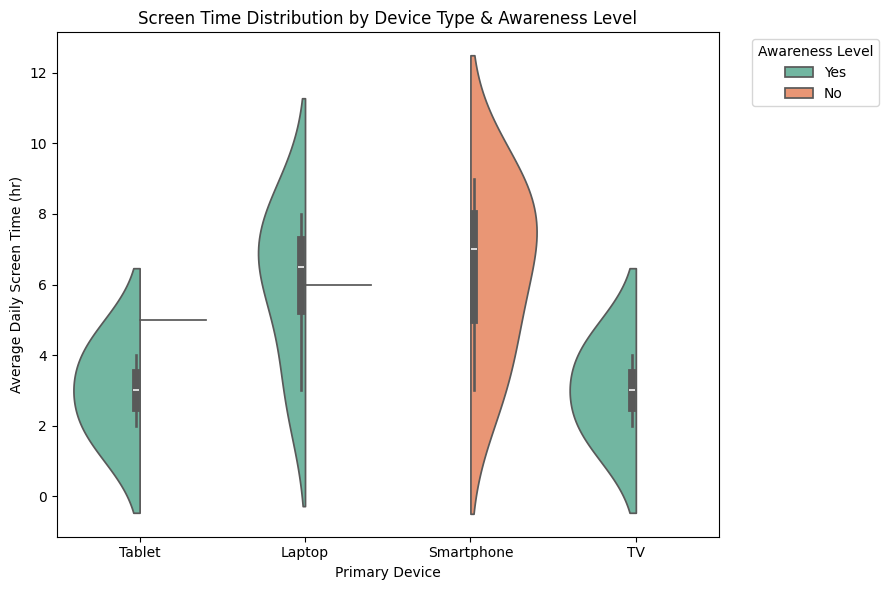

In [9]:
plt.figure(figsize=(9,6))
sns.violinplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='awareness',
    split=True,          # Split the violin for each awareness level
    palette='Set2',
    inner='box'          # Show the boxplot inside the violin
)
plt.title("Screen Time Distribution by Device Type & Awareness Level")
plt.xlabel("Primary Device")
plt.ylabel("Average Daily Screen Time (hr)")
plt.legend(title="Awareness Level", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()


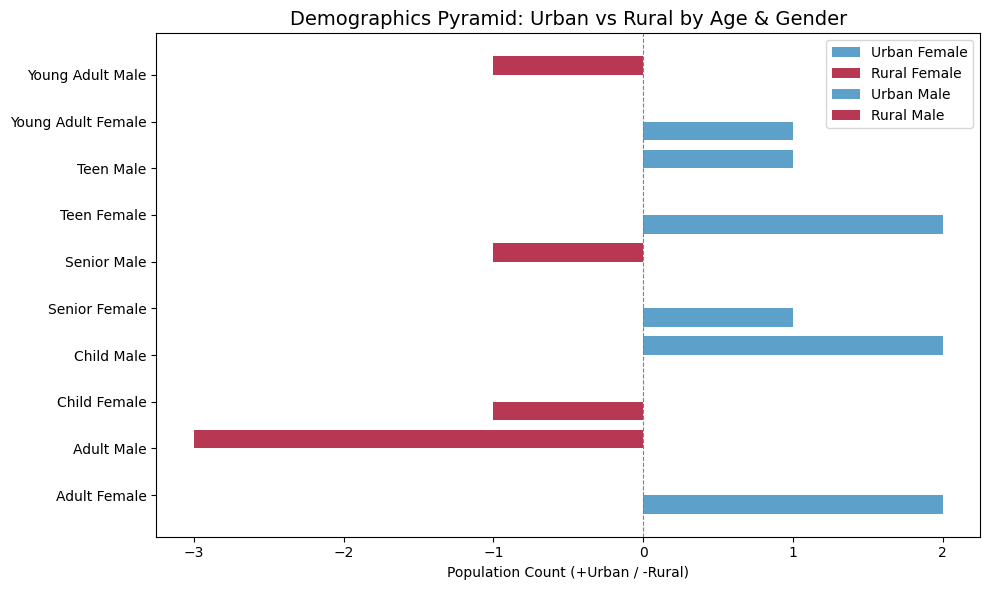

In [10]:
pyramid = df.groupby(['Age_Group', 'Gender', 'Urban_or_Rural']).size().unstack(fill_value=0).reset_index()

# Assign position
pyramid['Pos'] = np.arange(len(pyramid))

# Plot
plt.figure(figsize=(10,6))
bar_w = 0.4

for i, g in enumerate(pyramid['Gender'].unique()):
    sub = pyramid[pyramid['Gender'] == g]
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, sub['Urban'],  bar_w, color='#348ABD', alpha=0.8, label=f'Urban {g}')
    plt.barh(sub['Pos'] + (i-0.5)*bar_w, -sub['Rural'], bar_w, color='#A60628', alpha=0.8, label=f'Rural {g}')

plt.axvline(0, color='gray', lw=0.8, ls='--')
plt.yticks(pyramid['Pos'], pyramid[['Age_Group', 'Gender']].astype(str).agg(' '.join, axis=1))
plt.title("Demographics Pyramid: Urban vs Rural by Age & Gender", fontsize=14)
plt.xlabel("Population Count (+Urban / -Rural)")
plt.legend()
plt.tight_layout()
plt.show()


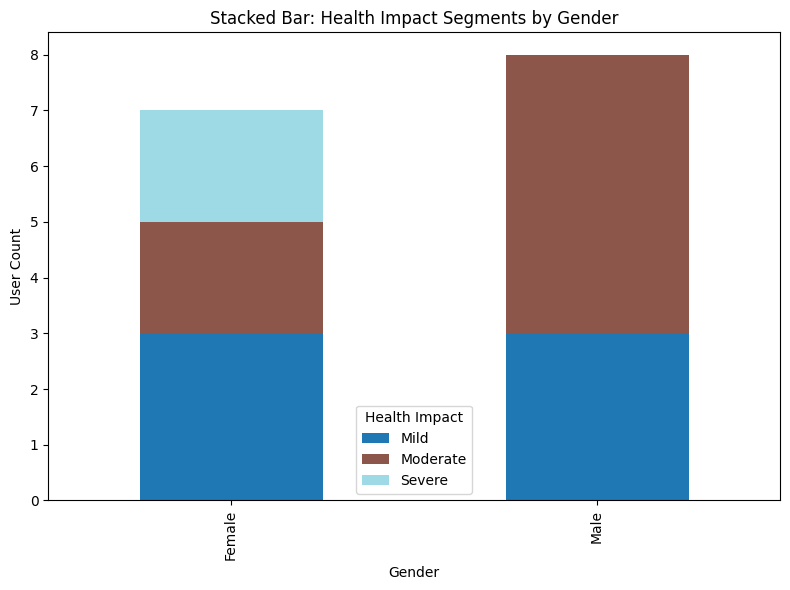

In [11]:
health_gender = pd.crosstab(df['Gender'], df['Health_Impact_Category'])
health_gender.plot(
    kind='bar', stacked=True, colormap='tab20', figsize=(8,6)
)
plt.title('Stacked Bar: Health Impact Segments by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Health Impact')
plt.tight_layout()
plt.show()

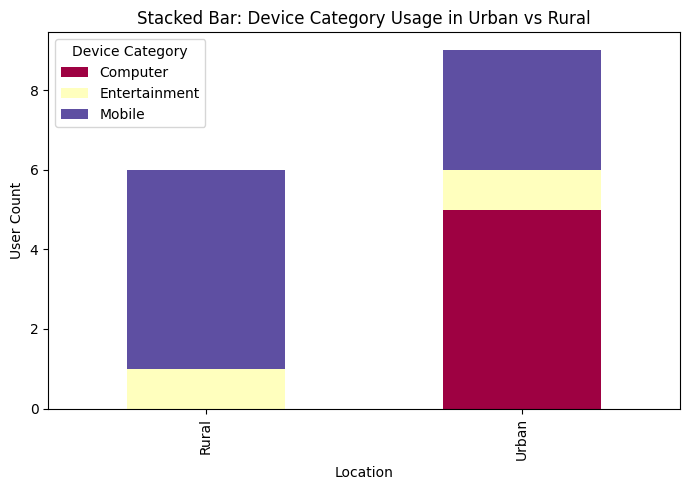

In [12]:
device_loc = pd.crosstab(df['Urban_or_Rural'], df['Device_Category'])
device_loc.plot(
    kind='bar', stacked=True, figsize=(7,5), colormap='Spectral'
)
plt.title('Stacked Bar: Device Category Usage in Urban vs Rural')
plt.xlabel('Location')
plt.ylabel('User Count')
plt.legend(title='Device Category')
plt.tight_layout()
plt.show()

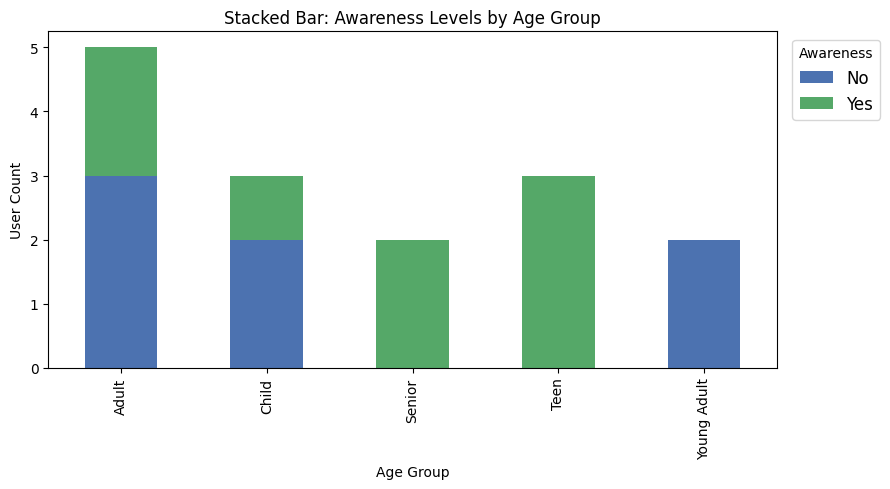

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

aware_age = pd.crosstab(df['Age_Group'], df['awareness'])
custom_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']
aware_age.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5),
    color=custom_colors  # Pick any distinct hex codes
)
plt.title('Stacked Bar: Awareness Levels by Age Group')
plt.ylabel('User Count')
plt.xlabel('Age Group')
plt.legend(title='Awareness', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

Overall Summary of Data Insights

Top Screen-Time Cohorts: The highest average daily screen time occurs among teenagers and late teens using TVs, tablets, or laptops, making these groups the riskiest for overuse.
Cohort Risk Structure (Heatmap): Heatmaps confirm that both device type and age affect average usage. Teenagers on TV and tablets, and late teens on laptops, have especially high screen hours.
Awareness vs Overuse: Groups showing higher awareness of screen risks ("Need Attention", "Critical Concern") tend to have higher screen time exceedance rates—suggesting awareness doesn't always reduce overuse.
Health Impact Clustering: Health impact types (mental, physical, both, or none) vary by gender; stacked bars show both males and females most frequently report mental and "no impact", with some differences in proportions.
Device Risk & Health (Clustered Bars): Portable devices are far more common than wall-mounted ones, with mental and both-impacts being most prevalent across all age cohorts.
Gender & Location: Heatmaps reveal small but noticeable differences in average screen time by gender (male/female) and living environment (urban/rural); rural-urban gaps are generally small, but structure may change by group.
Awareness by Age: Stacked analysis shows most "Need Attention" and "Moderate Concern" cases are concentrated in pre-teens and teenagers—highlighting targets for policy.
Demographics Pyramid: Urban youth (male and female) vastly outnumber rural counterparts, with a greater gap for pre-teens than for late teens or teenagers.
Device Access by Location: Urban children use both portable and wall-mounted devices more than rural peers, but the domination is especially strong for portable devices.
Distribution Analysis: Violin plots reveal outliers and risk tails—certain subgroups (e.g., high-awareness + smartphone users) reach 12+ hours of screen time.
Cohort Detail & Uniqueness: Clustered, stacked, and split visualizations (including box, violin, and heatmaps) offer deep comparisons and multi-segment risk profiling not visible from averages alone.
